In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.8.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
!unzip "/content/drive/MyDrive/Sign Language Project/full_bdsl.zip"

Streaming output truncated to the last 5000 lines.
         continuing with "central" filename version
  inflating: বাংলা বর্ণ/Digits/৮/8_New_4.jpg  
বাংলা বর্ণ/Digits/৮/8_New_40.jpg:  mismatching "local" filename (ржмрж╛ржВрж▓рж╛ ржмрж░рзНржг/Digits/рзо/8_New_40.jpg),
         continuing with "central" filename version
  inflating: বাংলা বর্ণ/Digits/৮/8_New_40.jpg  
বাংলা বর্ণ/Digits/৮/8_New_400.jpg:  mismatching "local" filename (ржмрж╛ржВрж▓рж╛ ржмрж░рзНржг/Digits/рзо/8_New_400.jpg),
         continuing with "central" filename version
  inflating: বাংলা বর্ণ/Digits/৮/8_New_400.jpg  
বাংলা বর্ণ/Digits/৮/8_New_401.jpg:  mismatching "local" filename (ржмрж╛ржВрж▓рж╛ ржмрж░рзНржг/Digits/рзо/8_New_401.jpg),
         continuing with "central" filename version
  inflating: বাংলা বর্ণ/Digits/৮/8_New_401.jpg  
বাংলা বর্ণ/Digits/৮/8_New_402.jpg:  mismatching "local" filename (ржмрж╛ржВрж▓рж╛ ржмрж░рзНржг/Digits/рзо/8_New_402.jpg),
         continuing with "central" filename version
  inflatin

In [ ]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.layers import Conv2D

from keras.layers import MaxPooling2D

In [ ]:
# input path for the images
base_path = '/content/বাংলা বর্ণ/Alphabates'

In [ ]:
SIZE=64
image_size = (SIZE, SIZE)
batch_size = 32
channels = 3
kernel = 4
stride = 1
pool = 2

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 48000 files belonging to 48 classes.
Using 38400 files for training.
Found 48000 files belonging to 48 classes.
Using 9600 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

# Ameliorated CNN

In [ ]:
model=Sequential()

model.add(Conv2D(16,kernel_size=kernel,strides=stride,padding='same',activation='relu',input_shape=(SIZE, SIZE, channels)))

model.add(MaxPool2D(pool_size=pool,strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))

model.add(Conv2D(64,kernel_size=kernel,strides=stride,activation='relu',padding='same'))

model.add(MaxPool2D((pool),2,padding='same'))
          
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
epochs = 50
history = model.fit(
    train_ds, epochs=epochs, callbacks=model_checkpoint, validation_data=val_ds,
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1200/1200 [==============================] - 45s 29ms/step - loss: 1.8255 - accuracy: 0.5182 - val_loss: 0.6401 - val_accuracy: 0.7538
Epoch 2/50
1200/1200 [==============================] - 34s 28ms/step - loss: 0.4236 - accuracy: 0.8038 - val_loss: 0.4151 - val_accuracy: 0.8035
Epoch 3/50
1200/1200 [==============================] - 34s 28ms/step - loss: 0.3629 - accuracy: 0.8165 - val_loss: 0.4042 - val_accuracy: 0.8071
Epoch 4/50
1200/1200 [==============================] - 34s 28ms/step - loss: 0.3255 - accuracy: 0.8263 - val_loss: 0.4203 - val_accuracy: 0.8012
Epoch 5/50
1200/1200 [==============================] - 34s 28ms/step - loss: 0.3055 - accuracy: 0.8330 - val_loss: 0.3597 - val_accuracy: 0.8182
Epoch 6/50
1200/1200 [==============================] - 35s 29ms/step - loss: 0.3293 - accuracy: 0.8263 - val_loss: 0.3480 - val_accuracy: 0.8250
Epoch 7/50
1200/1200 [==============================] - 34s 28ms/step - loss: 0.2889 - accuracy: 0.8372 - val_loss: 0.3749 - val_accura

In [ ]:
#save the model for predictions
model.save('/content/drive/MyDrive/Sign Language Project/full_model_bdsl_CNN.h5')

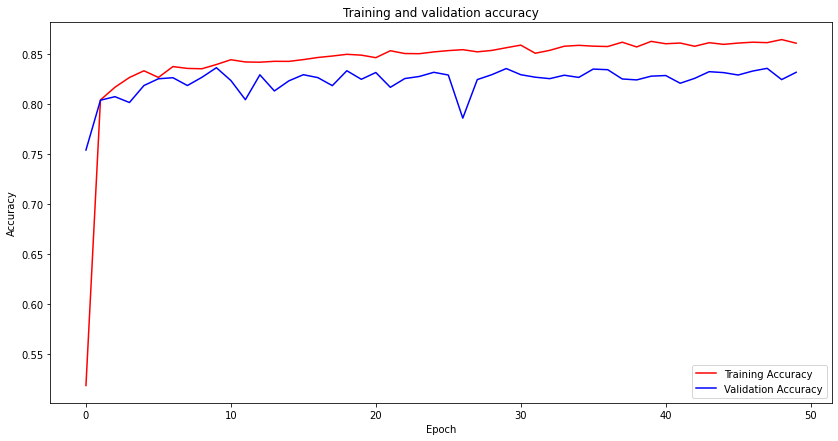

In [ ]:
# Validation and Training accuracy plot
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

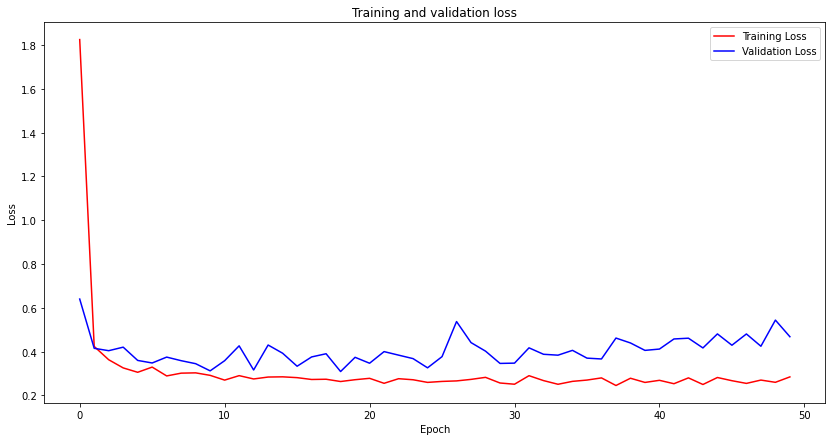

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
#Show predicition for one image

import tensorflow as tf
import cv2
import numpy as np
from skimage import transform


CATEGORIES = [',ং', ',ঃ', 'অ' 'য়', 'আ', 'ই','ঈ', 'উ','ঊ', 'ঋ','র','ড়','ঢ়', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ','ক্ষ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ত', 'থ', 'দ', 'ধ', 'ন','ণ', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'ল', 'শ', 'ষ', 'স','হ']




def convert(np_image):
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image




model = tf.keras.models.load_model("/content/drive/MyDrive/Sign Language Project/full_model_bdsl_CNN.h5")

In [ ]:
img = cv2.imread("/content/বাংলা বর্ণ/Alphabates/ই/S3_i_CC_New_132.jpg")
img.shape

(331, 331, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

ই


In [ ]:
img = cv2.imread("/content/বাংলা বর্ণ/Alphabates/গ/S12_go_CC_New_137.jpg")
img.shape

(331, 331, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

গ


In [ ]:
img = cv2.imread("/content/বাংলা বর্ণ/Alphabates/স/Sign 31_so_New_1003.jpg")
img.shape

(331, 331, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

ষ


In [ ]:
img = cv2.imread("/content/বাংলা বর্ণ/Alphabates/হ/Sign 32_ho_New_146.jpg")
img.shape

(331, 331, 3)

In [ ]:
image = convert(img)
image.shape

(1, 64, 64, 3)

In [ ]:
prediction = model.predict(image)

In [ ]:
print(CATEGORIES[int(np.argmax(prediction[0]))])

হ


# RESNET50

In [ ]:
classifier_resnet = resnet.ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_resnet.layers:
    layer.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=num_classes, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
history2 = model2.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1200/1200 [==============================] - 46s 36ms/step - loss: 4.7464 - accuracy: 0.5046 - val_loss: 2.3589 - val_accuracy: 0.7342
Epoch 2/50
1200/1200 [==============================] - 41s 34ms/step - loss: 3.6534 - accuracy: 0.6659 - val_loss: 2.6699 - val_accuracy: 0.7626
Epoch 3/50
1200/1200 [==============================] - 42s 35ms/step - loss: 3.6622 - accuracy: 0.7024 - val_loss: 2.8637 - val_accuracy: 0.7664
Epoch 4/50
1200/1200 [==============================] - 41s 34ms/step - loss: 3.7221 - accuracy: 0.7228 - val_loss: 3.1923 - val_accuracy: 0.7820
Epoch 5/50
1200/1200 [==============================] - 42s 35ms/step - loss: 3.8284 - accuracy: 0.7360 - val_loss: 2.7891 - val_accuracy: 0.7845
Epoch 6/50
1200/1200 [==============================] - 42s 35ms/step - loss: 3.8918 - accuracy: 0.7452 - val_loss: 3.0884 - val_accuracy: 0.7925
Epoch 7/50
1200/1200 [==============================] - 42s 35ms/step - loss: 3.8916 - accuracy: 0.7509 - val_loss: 3.1495 - val_accura

In [ ]:
model2.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_bdsl_resnet.h5')

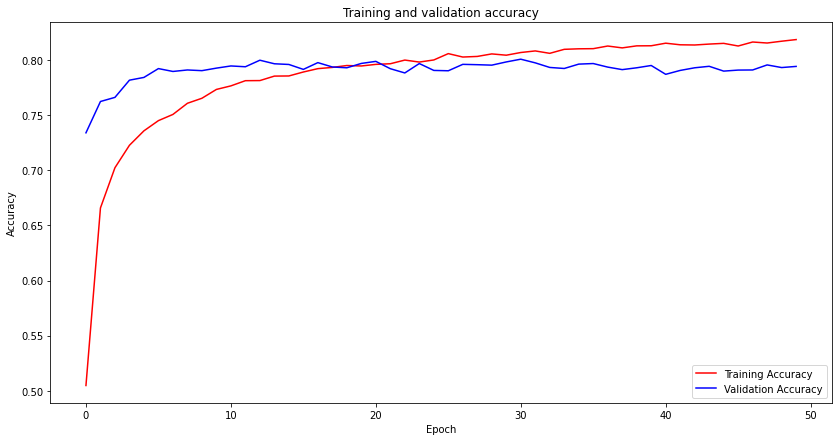

In [ ]:
# Validation and Training accuracy plot
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

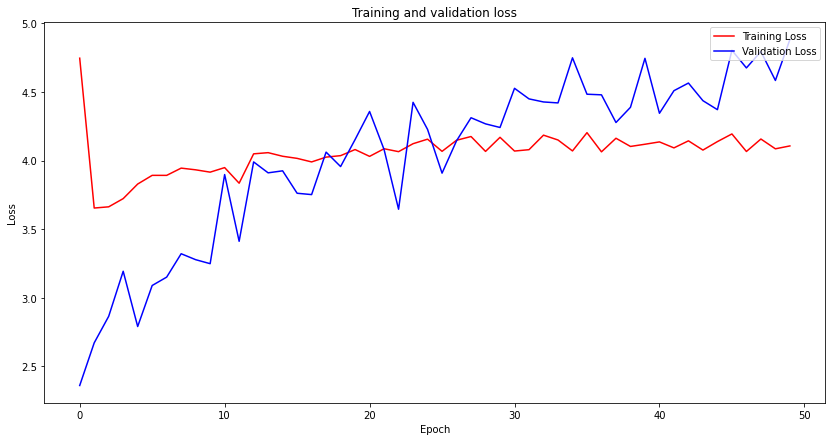

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# VGG16

In [ ]:
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
classifier3 = classifier_vgg16.output#head mode
classifier3 = Flatten()(classifier3)#adding layer of flatten
classifier3 = Dense(units=256, activation='relu')(classifier3)
classifier3 = Dropout(0.6)(classifier3)
classifier3 = Dense(units=num_classes, activation='softmax')(classifier3)

model3 = Model(inputs = classifier_vgg16.input , outputs = classifier3)
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history3 = model3.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1200/1200 [==============================] - 40s 32ms/step - loss: 4.1727 - accuracy: 0.1010 - val_loss: 3.0521 - val_accuracy: 0.2117
Epoch 2/50
1200/1200 [==============================] - 35s 29ms/step - loss: 3.3039 - accuracy: 0.1421 - val_loss: 2.7393 - val_accuracy: 0.2650
Epoch 3/50
1200/1200 [==============================] - 36s 30ms/step - loss: 3.1468 - accuracy: 0.1661 - val_loss: 2.5895 - val_accuracy: 0.2801
Epoch 4/50
1200/1200 [==============================] - 35s 29ms/step - loss: 3.0517 - accuracy: 0.1786 - val_loss: 2.4898 - val_accuracy: 0.3089
Epoch 5/50
1200/1200 [==============================] - 35s 29ms/step - loss: 3.0065 - accuracy: 0.1867 - val_loss: 2.4351 - val_accuracy: 0.3129
Epoch 6/50
1200/1200 [==============================] - 35s 29ms/step - loss: 2.9522 - accuracy: 0.1964 - val_loss: 2.4057 - val_accuracy: 0.3235
Epoch 7/50
1200/1200 [==============================] - 38s 31ms/step - loss: 2.9395 - accuracy: 0.1964 - val_loss: 2.3776 - val_accura

In [ ]:
model3.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_bdsl_vgg16.h5')

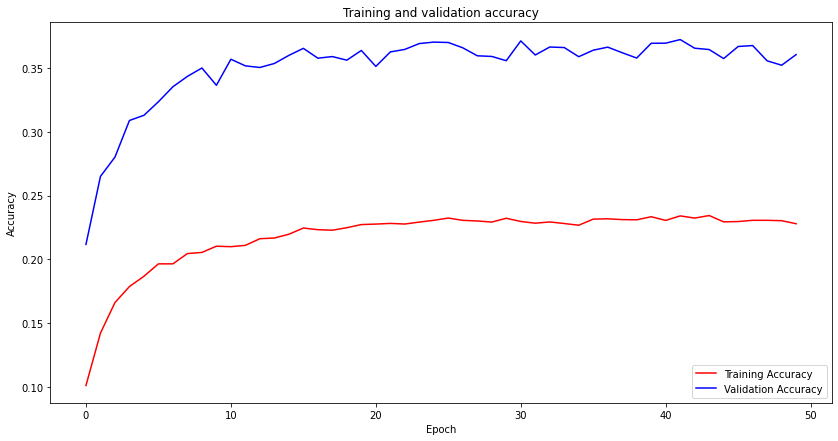

In [ ]:
# Validation and Training accuracy plot
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

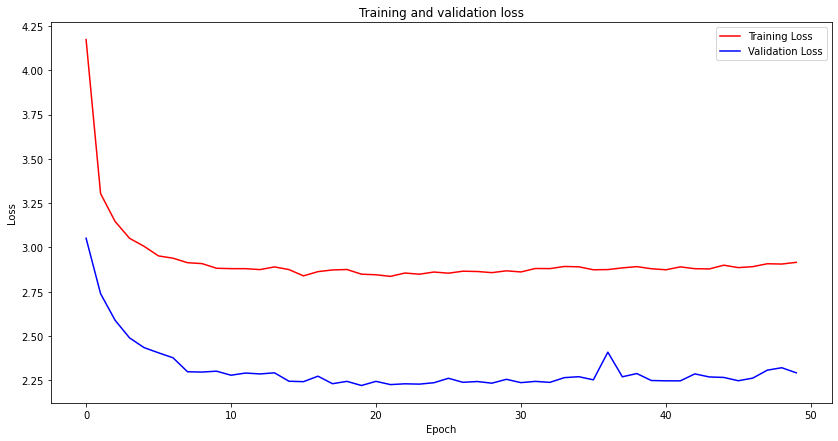

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

# VGG19

In [ ]:
classifier_vgg19 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')
for layer in classifier_vgg19.layers:
    layer.trainable = False

In [ ]:
classifier4 = classifier_vgg19.output#head mode
classifier4 = Flatten()(classifier4)#adding layer of flatten
classifier4 = Dense(units=256, activation='relu')(classifier4)
classifier4 = Dropout(0.6)(classifier4)
classifier4 = Dense(units=num_classes, activation='softmax')(classifier4)

model4 = Model(inputs = classifier_vgg19.input , outputs = classifier4)
model4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history4 = model4.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1200/1200 [==============================] - 41s 34ms/step - loss: 4.2050 - accuracy: 0.0917 - val_loss: 3.0271 - val_accuracy: 0.2121
Epoch 2/50
1200/1200 [==============================] - 40s 33ms/step - loss: 3.2920 - accuracy: 0.1419 - val_loss: 2.6756 - val_accuracy: 0.2864
Epoch 3/50
1200/1200 [==============================] - 41s 34ms/step - loss: 3.1311 - accuracy: 0.1641 - val_loss: 2.6121 - val_accuracy: 0.2942
Epoch 4/50
1200/1200 [==============================] - 34s 28ms/step - loss: 3.0652 - accuracy: 0.1756 - val_loss: 2.5107 - val_accuracy: 0.3120
Epoch 5/50
1200/1200 [==============================] - 34s 29ms/step - loss: 3.0231 - accuracy: 0.1836 - val_loss: 2.4324 - val_accuracy: 0.3159
Epoch 6/50
1200/1200 [==============================] - 34s 28ms/step - loss: 2.9986 - accuracy: 0.1905 - val_loss: 2.3803 - val_accuracy: 0.3351
Epoch 7/50
1200/1200 [==============================] - 34s 29ms/step - loss: 2.9644 - accuracy: 0.1956 - val_loss: 2.4088 - val_accura

In [ ]:
model4.save('/content/drive/MyDrive/Dataset of Sign_Language/full_model_bdsl_vgg19.h5')

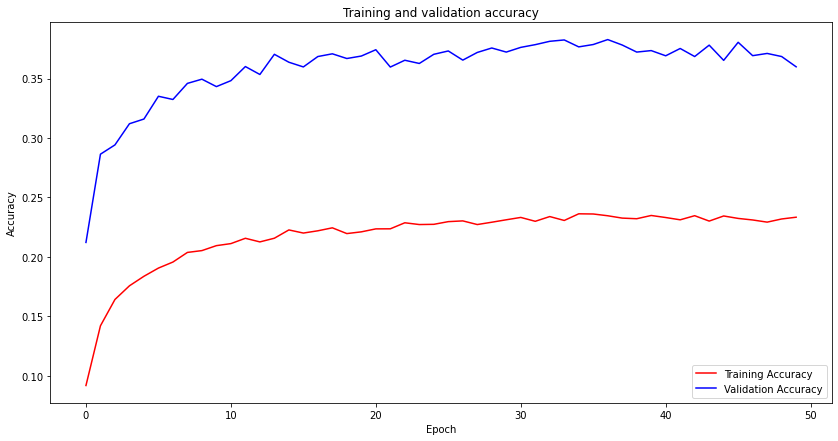

In [ ]:
# Validation and Training accuracy plot
acc=history4.history['accuracy']
val_acc=history4.history['val_accuracy']
loss=history4.history['loss']
val_loss=history4.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

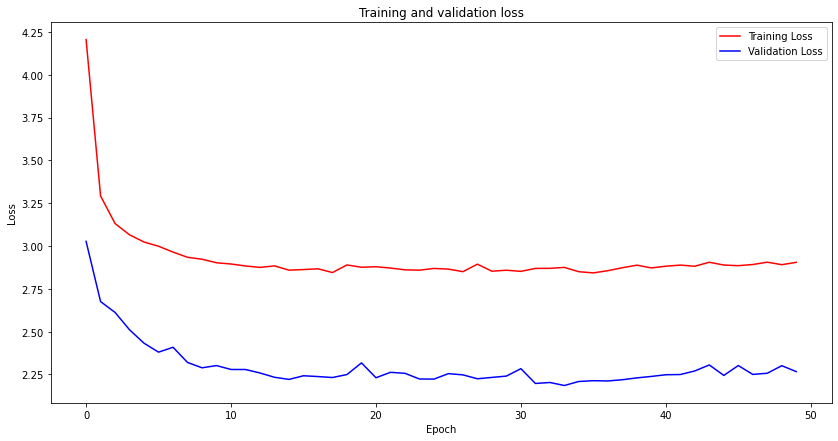

In [ ]:
#Validation and Training loss plot
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')